In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_Matrix'

/content/drive/My Drive/Colab Notebooks/dw_Matrix


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price= np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df ['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)
#liczenie sredniej przewidywalnej ceny butów

63.968341227870624

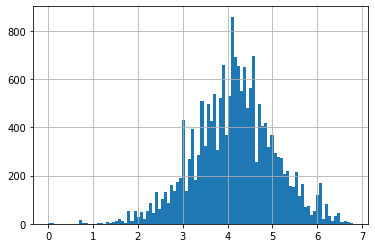

In [0]:
np.log1p( df['prices_amountmin'] ).hist(bins=100) 

In [0]:
# log1p = robienie wykresu 'normalnego' z long-tail


In [0]:
y_true = df ['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)
#liczenie mediany przewidywalnej ceny butów

58.01120240700219

In [0]:
df.brand.value_counts()

Nike             1709
PUMA              574
Ralph Lauren      524
New Balance       361
VANS              356
                 ... 
Mens                1
Reef Footwear       1
Array               1
Becko               1
DADAWEN             1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']

def run_model(feats): 
  X = df[ feats ].values
  Y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df.manufacturer.value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
REEF                1
Marc New York       1
PF-Flyers           1
SCARPA              1
Ridge Footwear      1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
many_feats = (['manufacturer_cat', 'brand_cat'])

In [0]:
run_model(many_feats)

(-58.539304199085976, 4.311223231615442)

In [1]:
pwd

'/content'

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_Matrix/matrix_one'



SyntaxError: ignored